# Data Validation
Data validation for azimuthal radial profiles

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u

Making fake star

In [9]:
blanky = np.ones([100,100]) # setting background value as 1
line_outward = np.arange(50,0,-1) # making star gradient
info = {'position': [49,49]} # setting star center

In [10]:
from radial import radius2d
r_blanky = radius2d(blanky, info)*u.arcsec

In [11]:
starry = np.ones([blanky.shape[0], blanky.shape[1]])

for i in range(blanky.shape[0]):
    for j in range(blanky.shape[1]):
        r_i = int(np.round(r_blanky[i,j].value))

        if r_i>20:
            starry[i,j] = 1

        else:
            starry[i,j] = line_outward[r_i]

starry = starry.copy()*u.Jy/u.arcsec**2 # make Jy/arc2 so we can use it
starry

<Quantity [[1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           ...,
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.]] Jy / arcsec2>

Text(0, 0.5, 'Pixels')

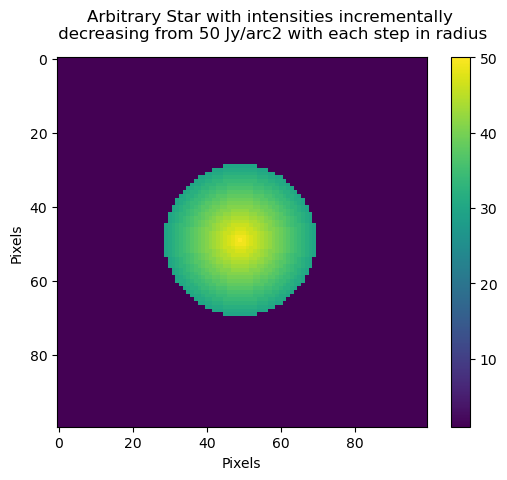

In [12]:
plt.imshow(starry.value)
plt.colorbar()
plt.suptitle("Arbitrary Star with intensities incrementally\n decreasing from 50 Jy/arc2 with each step in radius")
#plt.title("Radius = 20 arc, Background Median = 1 Jy/arc2")

plt.xlabel("Pixels")
plt.ylabel("Pixels")

## Add distinguishable regional variation

In [13]:
starry[60,40] = 25*u.Jy/u.arcsec**2
starry[60,60] = 0*u.Jy/u.arcsec**2
starry[40,60] = 150*u.Jy/u.arcsec**2
starry[40,40] = 100*u.Jy/u.arcsec**2

Text(40, 40, '100')

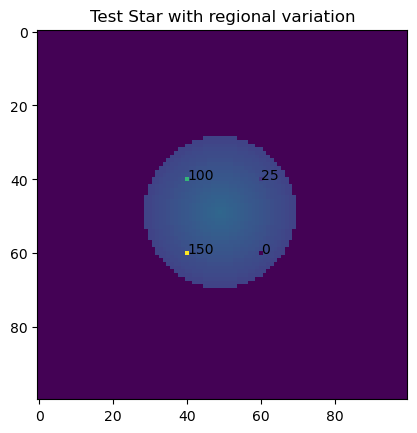

In [14]:
plt.imshow(starry.value.transpose())
plt.title("Test Star with regional variation")
plt.text(60,40, "25")
plt.text(60,60,"0")
plt.text(40,60, "150")
plt.text(40,40, "100")

actually starts facing due south and goes counter clockwise

In [15]:
np.where(starry==np.nanmax(starry))
cx=49
cy=49

In [16]:
from scipy.ndimage import map_coordinates


In [17]:
n_lines = 100
n_pts = 200

psis = np.linspace(0,2*np.pi, n_lines)
rs = np.linspace(0,200,200)

In [18]:
def lines(data, cx,cy, n_lines = 100, n_pts = 200,psis = np.linspace(0,2*np.pi, n_lines),
          rs = np.linspace(0,200,200)):
    '''
    returns n_lines rays of n_pts long radial profiles

    '''

    rys = np.zeros((n_lines, n_pts))

    for i, psi in enumerate(psis):
        x = cx + rs * np.cos(psi)
        y = cy + rs * np.sin(psi)


        coords = np.vstack((y,x))


        a = map_coordinates(data, coords, order = 1, mode='constant')

        rys[i] = a

    return rys

In [19]:
from matplotlib.pyplot import cm

In [20]:
def plot_1d_rays(rays,radius,psis, minpsi,maxpsi,suptitle = "Angular Radial Intensities",
                 xmin = -5, xmax = 105, ymin = -5, ymax= 55):
    '''
    plot 1d density and intensity functions.
    can select plot x and y limits. default values inputted otherwise
    '''

    #ax1_ymin=1e-6, ax1_ymax=1e1,xmin=0,xmax=0.31,

    plt.rcParams["font.family"] = "times"
    fig, (ax1) = plt.subplots(1, 1, figsize = [8,4])
    fig.suptitle(suptitle)

    color=iter(cm.viridis(np.linspace(0,1,rays.shape[0])))

    col = []


    for i in range(rays.shape[0]):
        c = next(color)
        col.append(c)
        ax1.plot(radius,rays[i],'o-',alpha=0.4,label = f"{np.round(psis[i]/np.pi,2)} $\pi$",c=c)


    ax1.set_xlim(xmin,xmax)
    ax1.set_ylim(ymin, ymax)
    #ax1.semilogy()
    #line_collection = LineCollection(rays, color = col)
    cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
                 ticks = [minpsi, maxpsi])
    cbar.set_ticklabels([f"{np.round(np.min(psis)/np.pi,1)} $\pi$", f"{np.round(np.max(psis)/np.pi,1)} $\pi$"])

    ax1.set_xlabel('Radius (arc)')
    ax1.set_ylabel(r'Intensity (Jy arc$^{-2}$)')

    fig.show()

0,24 25,50 51,76 77:

In [21]:
np.max(lines(starry,cx,cy)[0:25])

50.0

In [22]:
np.max(lines(starry,cx,cy)[25:50])

50.0

In [23]:
np.max(lines(starry,cx,cy)[50:75])

73.16287463317923

In [24]:
np.max(lines(starry,cx,cy)[75:100])

121.00090180975923

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_13348/2206824281.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_13348/2206824281.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


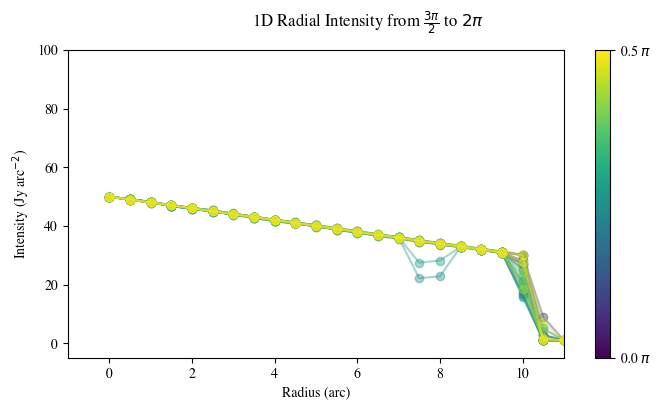

In [25]:
plot_1d_rays(lines(starry,cx,cy)[0:25], np.arange(0,100,.5),psis = psis[0:25], 
             minpsi = 3*np.pi/2, maxpsi = 2*np.pi, suptitle = r"1D Radial Intensity from $\frac{3\pi}{2}$ to $2\pi$",
             xmin = -1,xmax=11, ymin=-5, ymax = 100)

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_13348/2206824281.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_13348/2206824281.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


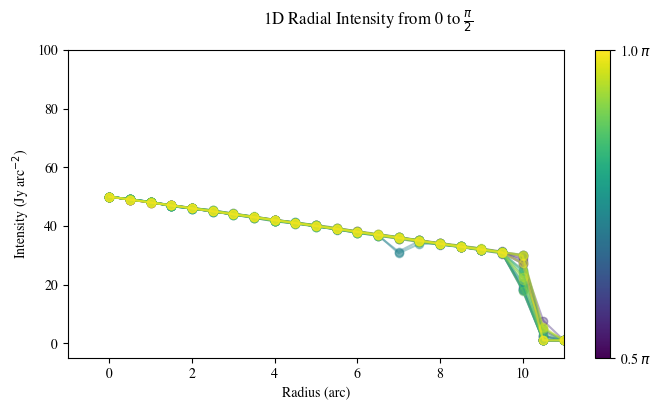

In [26]:
plot_1d_rays(lines(starry,cx,cy)[25:50], np.arange(0,100,.5),psis = psis[25:50], 
             minpsi = 0, maxpsi = np.pi/2, suptitle = r"1D Radial Intensity from 0 to $\frac{\pi}{2}$",
             xmin = -1,xmax=11, ymin=-5, ymax = 100)

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_13348/2206824281.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_13348/2206824281.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


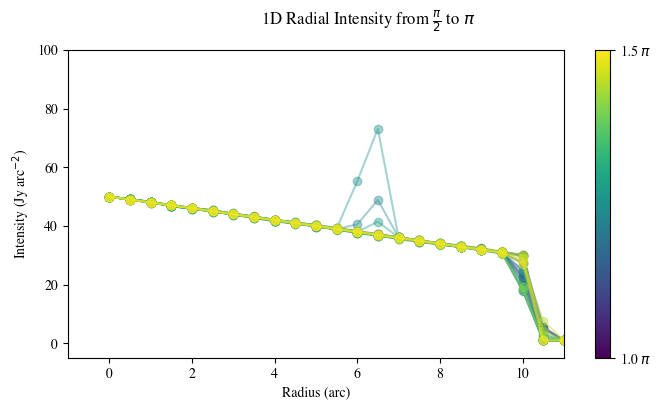

In [27]:
plot_1d_rays(lines(starry,cx,cy)[50:75], np.arange(0,100,.5),psis = psis[50:75], 
             minpsi = np.pi/2, maxpsi = np.pi, suptitle = r"1D Radial Intensity from $\frac{\pi}{2}$ to $\pi$",
             xmin = -1,xmax=11, ymin=-5, ymax = 100)

/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_13348/2206824281.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=minpsi, vmax=maxpsi)),
/var/folders/ly/x_9nwhsj0y7c7t4jnvrlhzzm0000gn/T/ipykernel_13348/2206824281.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


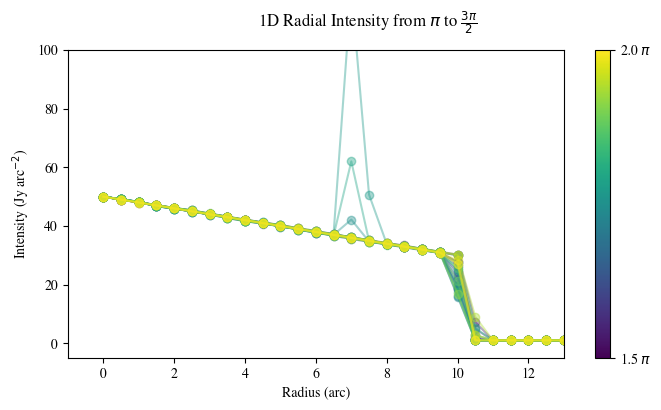

In [28]:
plot_1d_rays(lines(starry,cx,cy)[75:100], np.arange(0,100,.5),psis = psis[75:100],
             minpsi = np.pi, maxpsi = 3*np.pi/2, suptitle = r"1D Radial Intensity from $\pi$ to $\frac{3\pi}{2}$",
             xmin =-1, xmax = 13, ymin = -5, ymax = 100)